## Importing Data

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Importing Dataset
score = pd.read_csv('Leads.csv')
score.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## Inspecting The Dataframe

In [4]:
score.shape

(9240, 37)

In [5]:
score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
#Checking Percentage of missing values
missing_data = round((score.isna().sum()/len(score)) * 100,2).sort_values(ascending=False)
missing_data

Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
Tags                                             36.29
What matters most to you in choosing a course    29.32
Lead Profile                                     29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Cal

### Treating Missing Values

In [7]:
#Dropping all the columns having missing values above 45 percent 
missing_data[missing_data>45].index

Index(['Lead Quality', 'Asymmetrique Profile Score',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Index',
       'Asymmetrique Activity Index'],
      dtype='object')

In [8]:
score.drop(columns=missing_data[missing_data>45].index,inplace=True)

In [9]:
missing_data = round((score.isna().sum()/len(score)) * 100,2).sort_values(ascending=False)
missing_data

Tags                                             36.29
What matters most to you in choosing a course    29.32
Lead Profile                                     29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Lead Origin                                       0.00
Lead Number                                       0.00
Do Not Email                                      0.00
Converted                                         0.00
Total Time Spent on Website                       0.00
Do Not Call                                       0.00
Last Notab

In [10]:
#Checking categorical columns having missing values above 10 percent 
score_categorical = missing_data[missing_data>10].index
score_categorical

Index(['Tags', 'What matters most to you in choosing a course', 'Lead Profile',
       'What is your current occupation', 'Country',
       'How did you hear about X Education', 'Specialization', 'City'],
      dtype='object')

In [11]:
#Plotting for categorical column having missing values above 10 percent
#for i in score_categorical:
    #sns.countplot(score[i])
    #plt.xticks(rotation=90)


**There are columns in the dataset which are generated by the sales team for their convenience for contacting persons.
Such columns are found and dropped**

In [12]:
#Sales Team Generated
score.drop(columns=['How did you hear about X Education', 'What matters most to you in choosing a course', 'Tags', 'Lead Profile', 'Last Notable Activity'], inplace=True)

In [13]:
missing_data = round((score.isna().sum()/len(score)) * 100,2).sort_values(ascending=False)
missing_data

What is your current occupation             29.11
Country                                     26.63
Specialization                              15.56
City                                        15.37
TotalVisits                                  1.48
Page Views Per Visit                         1.48
Last Activity                                1.11
Lead Source                                  0.39
Lead Number                                  0.00
Lead Origin                                  0.00
Do Not Email                                 0.00
Do Not Call                                  0.00
Converted                                    0.00
Total Time Spent on Website                  0.00
A free copy of Mastering The Interview       0.00
I agree to pay the amount through cheque     0.00
Search                                       0.00
Magazine                                     0.00
Newspaper Article                            0.00
X Education Forums                           0.00


***While treating the missing values for all the columns, there are levels which are very less when compared to others
Hence these categories are capped in the form of 'Other' to avoid large individual columns while modelling***

*All the missing values are capped to 'Other'*

In [14]:
score['What is your current occupation'].value_counts(normalize=True)

Unemployed              0.854962
Working Professional    0.107786
Student                 0.032061
Other                   0.002443
Housewife               0.001527
Businessman             0.001221
Name: What is your current occupation, dtype: float64

In [15]:
score['What is your current occupation'].replace(['Housewife','Businessman'], 'Other', inplace=True)

In [16]:
#Treating missing values for the column 'What is your current occupation'
score['What is your current occupation'].fillna('Other', inplace=True)

In [17]:
score['Country'].value_counts(normalize=True)

India                   0.957663
United States           0.010178
United Arab Emirates    0.007818
Singapore               0.003540
Saudi Arabia            0.003098
United Kingdom          0.002213
Australia               0.001918
Qatar                   0.001475
Hong Kong               0.001033
Bahrain                 0.001033
Oman                    0.000885
France                  0.000885
unknown                 0.000738
Nigeria                 0.000590
Germany                 0.000590
Canada                  0.000590
Kuwait                  0.000590
South Africa            0.000590
Sweden                  0.000443
Italy                   0.000295
Asia/Pacific Region     0.000295
Philippines             0.000295
Bangladesh              0.000295
Ghana                   0.000295
Uganda                  0.000295
Belgium                 0.000295
Netherlands             0.000295
China                   0.000295
Denmark                 0.000148
Sri Lanka               0.000148
Russia    

In [18]:
#Capping all other countries other than India
score['Country'].replace(['United States', 'United Arab Emirates', 'Singapore', 'Saudi Arabia', 'United Kingdom', 'Australia', 'Qatar', 'Hong Kong', 'Bahrain', 'Oman', 'France', 'unknown', 'Germany', 'Canada', 'South Africa', 'Nigeria', 'Kuwait', 'Sweden', 'Asia/Pacific Region', 'Italy', 'Bangladesh', 'China', 'Ghana', 'Uganda', 'Belgium', 'Netherlands', 'Philippines', 'Denmark', 'Tanzania', 'Russia', 'Switzerland', 'Malaysia', 'Sri Lanka', 'Kenya', 'Vietnam', 'Liberia', 'Indonesia'], 'Abroad', inplace=True)

In [19]:
#Treating missing values for the column 'Country'
score['Country'].fillna('Abroad', inplace=True)

In [20]:
score['Specialization'].value_counts(normalize=True)

Select                               0.248911
Finance Management                   0.125096
Human Resource Management            0.108690
Marketing Management                 0.107408
Operations Management                0.064471
Business Administration              0.051653
IT Projects Management               0.046911
Supply Chain Management              0.044732
Banking, Investment And Insurance    0.043322
Media and Advertising                0.026019
Travel and Tourism                   0.026019
International Business               0.022815
Healthcare Management                0.020379
Hospitality Management               0.014612
E-COMMERCE                           0.014355
Retail Management                    0.012817
Rural and Agribusiness               0.009357
E-Business                           0.007306
Services Excellence                  0.005127
Name: Specialization, dtype: float64

**As given in problem statement categorical columns having a level 'Select' should be treated as null values**

*Since we are capping all missing values under 'Other', we have directly capped 'Select' value*

In [21]:
score['Specialization'].replace(['Select','Rural and Agribusiness', 'E-Business', 'Services Excellence'], 'Other', inplace=True)

In [22]:
#Treating missing values for the column 'Specialization'
score['Specialization'].fillna('Other', inplace=True)

In [23]:
score['City'].value_counts()

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [24]:
score['City'].replace('Select', 'Other Cities', inplace=True)

In [25]:
#Treating missing values for the column 'City'
score['City'].fillna('Other Cities', inplace=True)

**Treating numerical columns**

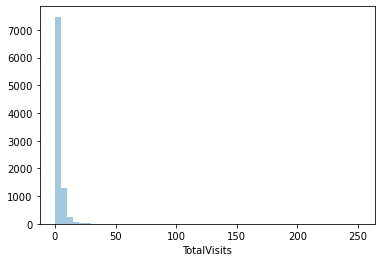

In [26]:
#plotting distplot
sns.distplot(score['TotalVisits'], kde=False)
plt.show()

In [27]:
#Treating missing values for the column 'TotalVisits'
score['TotalVisits'].fillna(score['TotalVisits'].mode()[0], inplace=True)

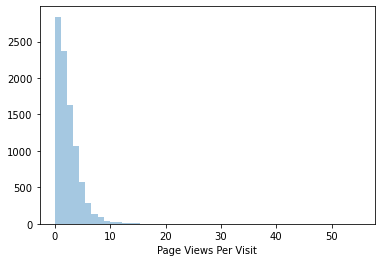

In [28]:
sns.distplot(score['Page Views Per Visit'], kde=False)
plt.show()

In [29]:
#Treating missing values for the column 'Page Views Per Visit'
score['Page Views Per Visit'].fillna(score['Page Views Per Visit'].mode()[0], inplace=True)

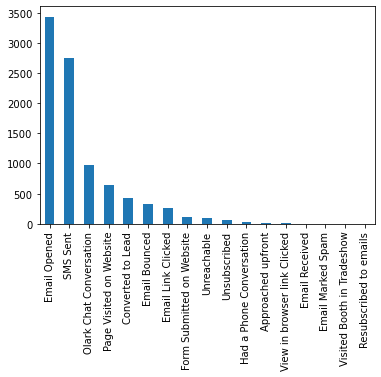

In [30]:
score['Last Activity'].value_counts().plot.bar()
plt.show()

In [31]:
score['Last Activity'].value_counts(normalize=True)

Email Opened                    0.376163
SMS Sent                        0.300427
Olark Chat Conversation         0.106490
Page Visited on Website         0.070045
Converted to Lead               0.046843
Email Bounced                   0.035679
Email Link Clicked              0.029222
Form Submitted on Website       0.012696
Unreachable                     0.010178
Unsubscribed                    0.006676
Had a Phone Conversation        0.003283
Approached upfront              0.000985
View in browser link Clicked    0.000657
Email Received                  0.000219
Email Marked Spam               0.000219
Visited Booth in Tradeshow      0.000109
Resubscribed to emails          0.000109
Name: Last Activity, dtype: float64

In [32]:
#Treating missing values for the column 'Last Activity'
score['Last Activity'].fillna('Other', inplace=True)

In [33]:
score['Last Activity'].replace(['Unsubscribed', 'Had a Phone Conversation', 'Approached upfront', 'View in browser link Clicked', 'Email Marked Spam', 'Email Received', 'Resubscribed to emails', 'Visited Booth in Tradeshow'], 'Other', inplace=True)

In [34]:
score['Lead Source'].value_counts(normalize=True)

Google               0.311604
Direct Traffic       0.276293
Olark Chat           0.190678
Organic Search       0.125380
Reference            0.058018
Welingak Website     0.015428
Referral Sites       0.013581
Facebook             0.005976
bing                 0.000652
google               0.000543
Click2call           0.000435
Live Chat            0.000217
Press_Release        0.000217
Social Media         0.000217
blog                 0.000109
welearnblog_Home     0.000109
WeLearn              0.000109
Pay per Click Ads    0.000109
NC_EDM               0.000109
testone              0.000109
youtubechannel       0.000109
Name: Lead Source, dtype: float64

In [35]:
score['Lead Source'].replace('google', 'Google', inplace=True)

In [36]:
score['Lead Source'].replace(['Facebook','bing', 'Click2call', 'Live Chat', 'Social Media', 'Press_Release', 'welearnblog_Home', 'Pay per Click Ads', 'blog', 'testone', 'WeLearn', 'NC_EDM', 'youtubechannel'], 'Other', inplace=True)

In [37]:
#Treating missing values for the column 'Last Source'
score['Lead Source'].fillna('Other', inplace=True)

In [38]:
#Extracting categorical columns from the dataset
score_cat = score.select_dtypes(include='object').columns
score_cat

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview'],
      dtype='object')

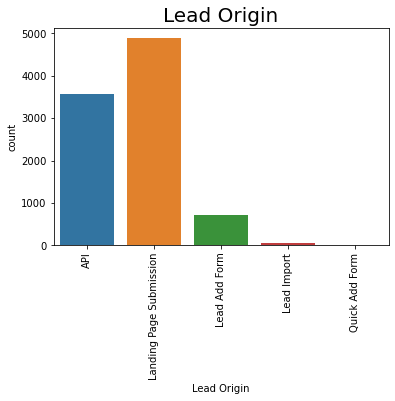

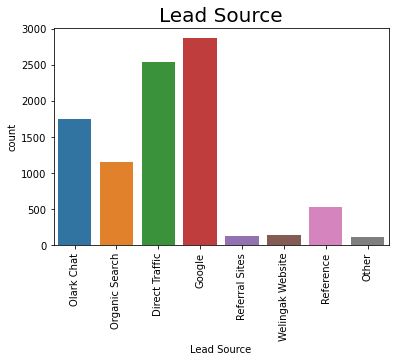

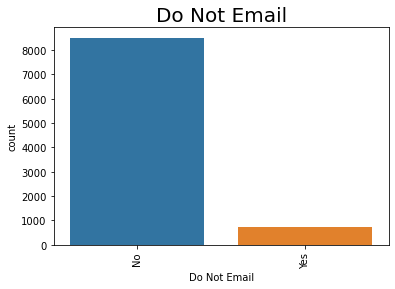

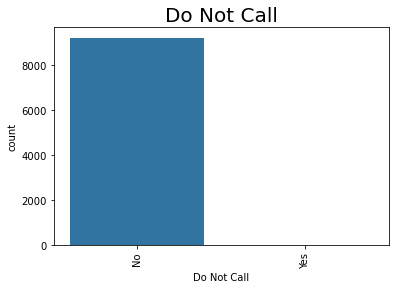

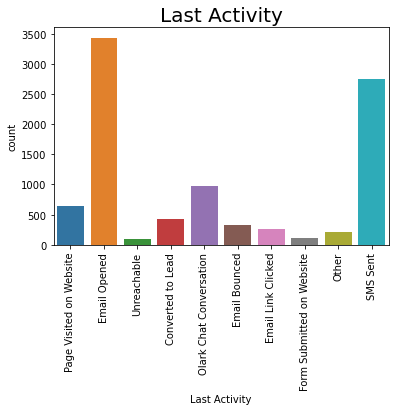

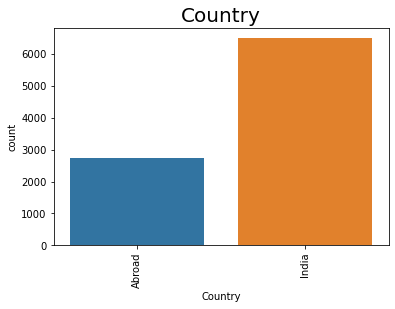

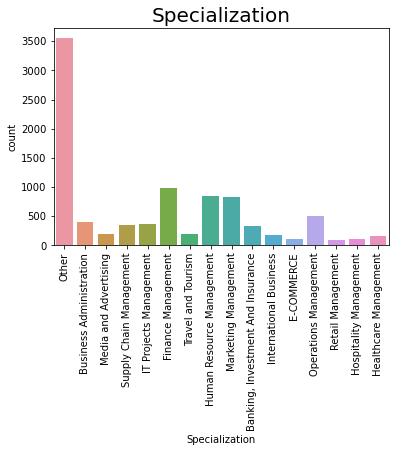

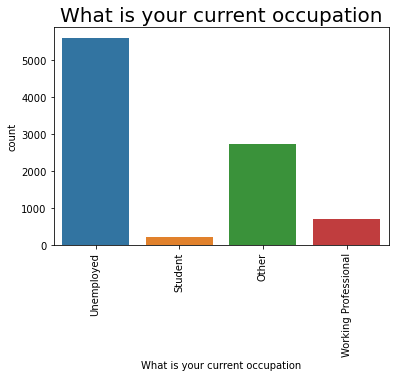

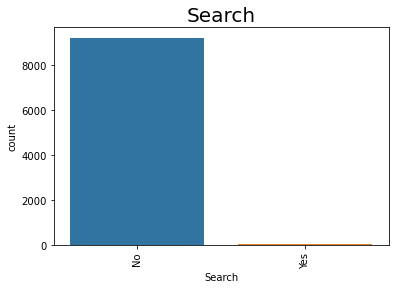

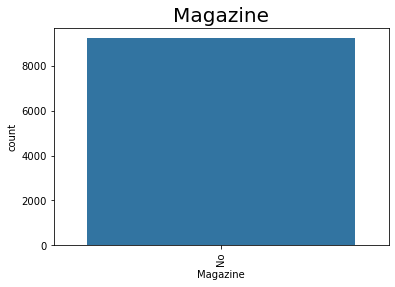

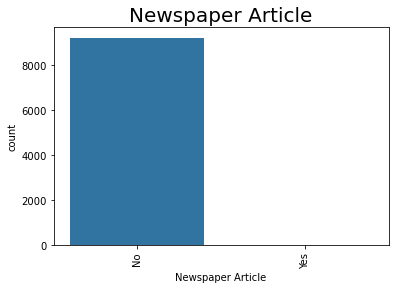

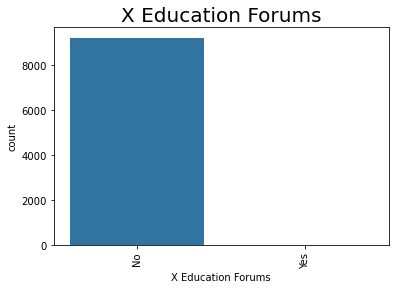

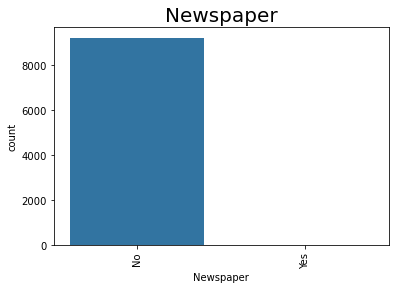

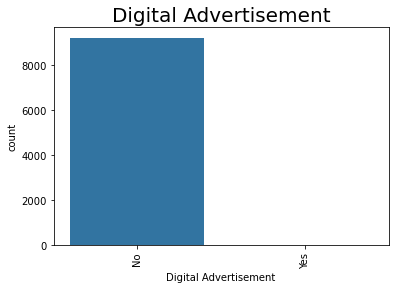

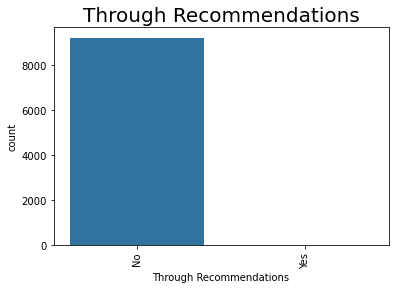

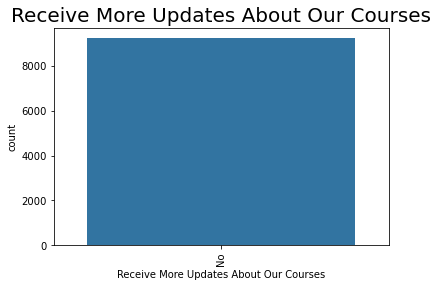

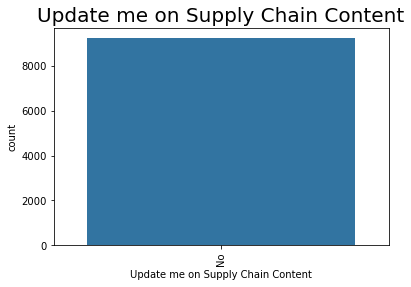

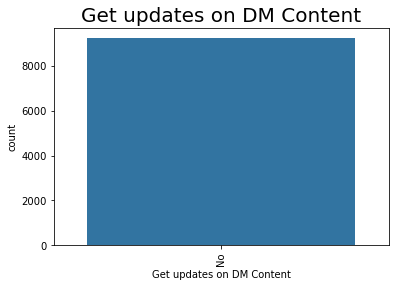

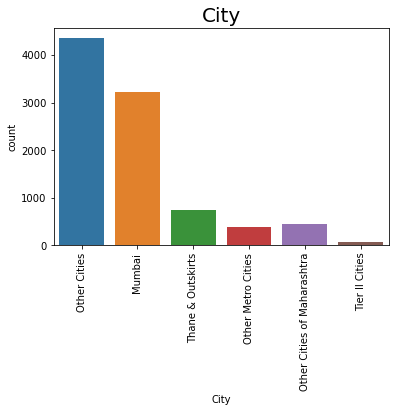

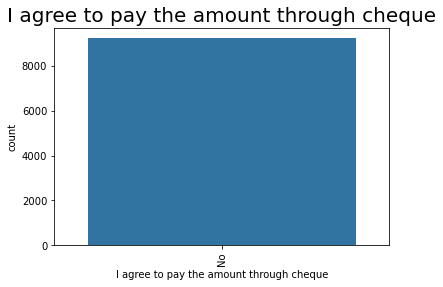

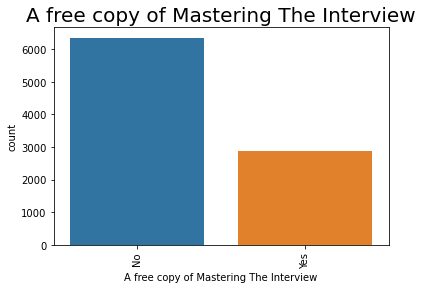

In [39]:
#Plotting for categorical column
for i in score_cat[1:]:
    sns.countplot(score[i])
    plt.xticks(rotation=90)
    plt.title(i, fontdict={'fontsize':20,'fontweight':5})
    plt.show()

**From the plot above we can find that some columns have values which are heavily skewed,
Hence we can drop these column to reduce inefficiency during modelling**

In [40]:
score.drop(columns = ['I agree to pay the amount through cheque', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content'], inplace=True)

In [41]:
#checking for missing values
score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9240 non-null   object 
 1   Lead Number                             9240 non-null   int64  
 2   Lead Origin                             9240 non-null   object 
 3   Lead Source                             9240 non-null   object 
 4   Do Not Email                            9240 non-null   object 
 5   Converted                               9240 non-null   int64  
 6   TotalVisits                             9240 non-null   float64
 7   Total Time Spent on Website             9240 non-null   int64  
 8   Page Views Per Visit                    9240 non-null   float64
 9   Last Activity                           9240 non-null   object 
 10  Country                                 9240 non-null   obje

*As all the missing values are treated. Now the dataset is free from missing values*

### Checking for Outliers

In [42]:
#Extracting numerical columns from the dataset
score_num = score.select_dtypes(exclude='object').columns
score_num

Index(['Lead Number', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit'],
      dtype='object')

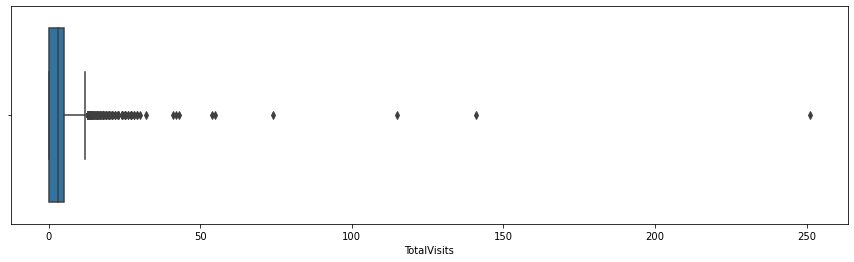

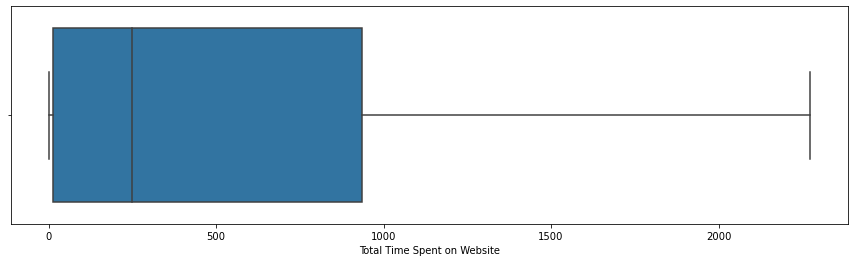

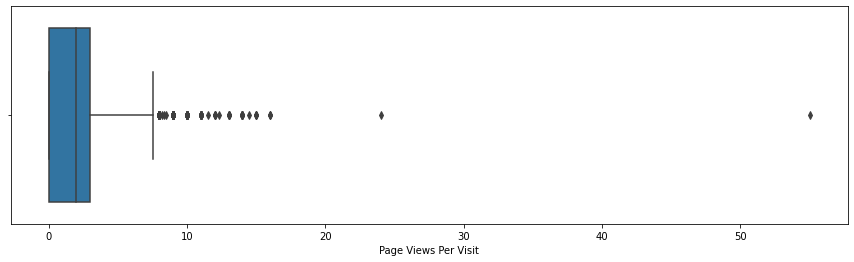

In [43]:
#Since first two columns are unique id's, we can do boxplot without that variables
for i in score_num[2:]:
    plt.figure(figsize=(15,4))
    sns.boxplot(score[i])
    plt.show()

In [44]:
#Converting into 'int'
score['TotalVisits'] = score['TotalVisits'].astype('int64')
score['Page Views Per Visit'] = score['Page Views Per Visit'].astype('int64')

*Since there are very less outliers, we can replace them with max quantile value*

In [45]:
score['TotalVisits'].replace([251,141, 115],int(score['TotalVisits'].quantile(0.99)),inplace=True)

In [46]:
score['Page Views Per Visit'].replace([24, 55],int(score['Page Views Per Visit'].quantile(0.99)),inplace=True)

**Separating categorical variable**

In [47]:
score_cat = score.select_dtypes(include='object').columns
score_cat

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation', 'City',
       'A free copy of Mastering The Interview'],
      dtype='object')

## Bivariate Analysis

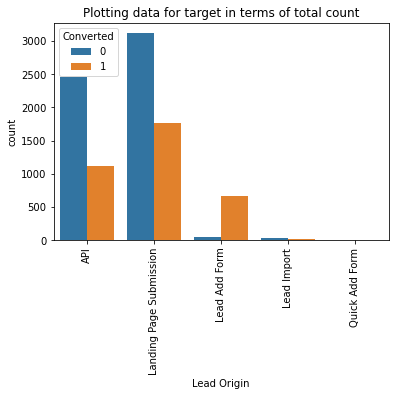

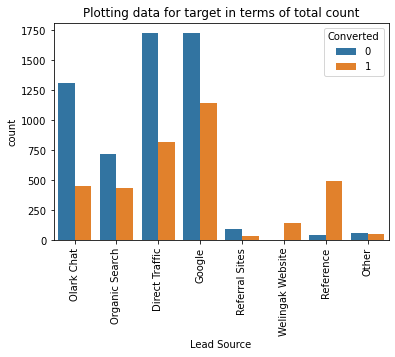

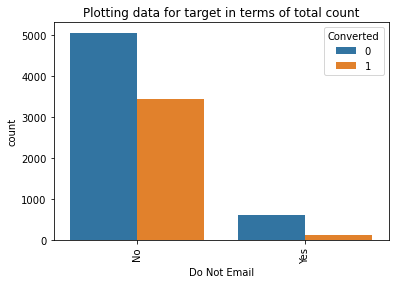

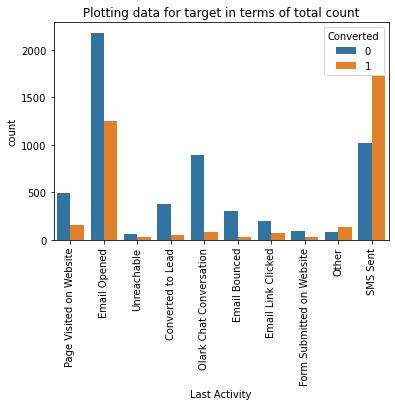

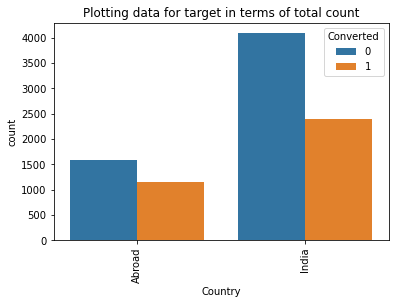

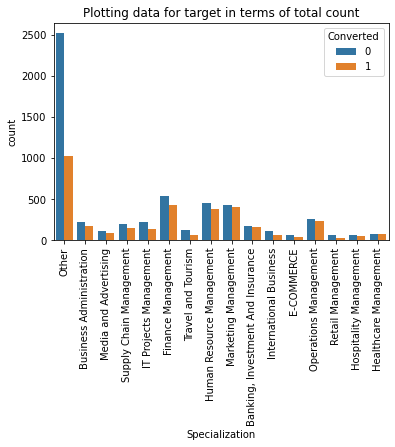

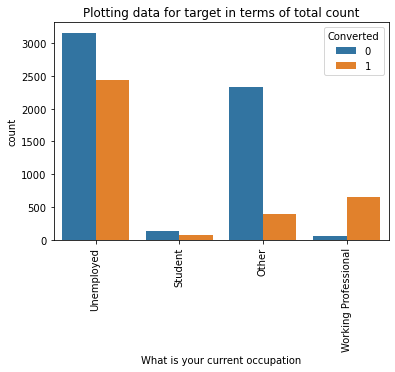

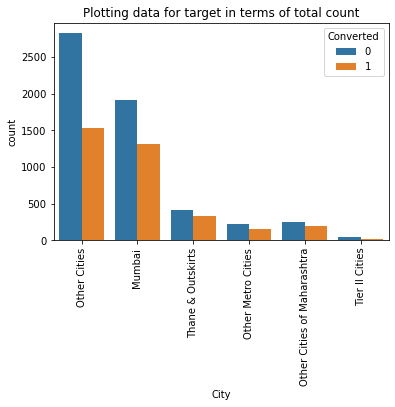

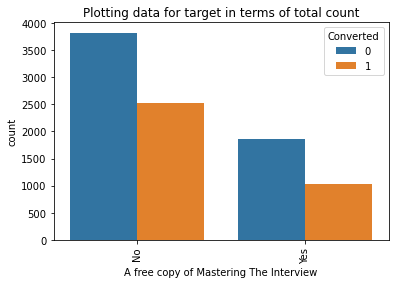

In [48]:
for column in score_cat[1:]:
    sns.countplot(x= column, hue = 'Converted', data = score)
    plt.xticks(rotation=90)
    plt.title('Plotting data for target in terms of total count')
    plt.show()

1. Reference and Welingak Website values in Lead Source tells us that Lead having these both tend to join the coarse
2. SMS Sent in Last Activity tells us that Lead having this values tend to join the coarse
3. Working Residential in Occupation tells us that Lead having this values tend to join the coarse.

## Data Preparation

#### Converting some binary variables (Yes/No) to 0/1

In [49]:
varlist = ['Do Not Email', 'A free copy of Mastering The Interview']
# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the score list
score[varlist] = score[varlist].apply(binary_map)

In [50]:
# Creating dummy variables for the remaining categorical variables and dropping the level with big names.

# Creating dummy variables for the variable 'Lead Origin'
dummy1 = pd.get_dummies(score['Lead Origin'], prefix='Lead Origin', drop_first=True)
# Dropping Duplicate column
score.drop(columns = 'Lead Origin', inplace=True)
#Adding the results to the master dataframe
score = pd.concat([score,dummy1], axis=1)

# Creating dummy variables for the variable 'Lead Source'
dummy2 = pd.get_dummies(score['Lead Source'], prefix='Lead Source', drop_first=True)
# Dropping Duplicate column
score.drop(columns = 'Lead Source', inplace=True)
#Adding the results to the master dataframe
score = pd.concat([score,dummy2], axis=1)


# Creating dummy variables for the variable 'Specialization'
dummy3 = pd.get_dummies(score['Specialization'], prefix='Specialization', drop_first=True)
# Dropping Duplicate column
score.drop(columns = 'Specialization', inplace=True)
#Adding the results to the master dataframe
score = pd.concat([score,dummy3], axis=1)


# Creating dummy variables for the variable 'What is your current occupation'
dummy4 = pd.get_dummies(score['What is your current occupation'], prefix='occupation', drop_first=True)
# Dropping Duplicate column
score.drop(columns = 'What is your current occupation', inplace=True)
#Adding the results to the master dataframe
score = pd.concat([score,dummy4], axis=1)


# Creating dummy variables for the variable 'City'
dummy5 = pd.get_dummies(score['City'], drop_first=True)
# Dropping Duplicate column
score.drop(columns = 'City', inplace=True)
#Adding the results to the master dataframe
score = pd.concat([score,dummy5], axis=1)

# Creating dummy variables for the variable 'Country'
dummy6 = pd.get_dummies(score['Country'], drop_first=True)
# Dropping Duplicate column
score.drop(columns = 'Country', inplace=True)
#Adding the results to the master dataframe
score = pd.concat([score,dummy6], axis=1)

# Creating dummy variables for the variable 'Last Activity'
dummy7 = pd.get_dummies(score['Last Activity'], prefix='Last Activity', drop_first=True)
# Dropping Duplicate column
score.drop(columns = 'Last Activity', inplace=True)
#Adding the results to the master dataframe
score = pd.concat([score,dummy7], axis=1)

In [51]:
score.head()

,Prospect ID,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,...,India,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,5,674,2,0,0,0,...,1,0,0,1,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,1,2,1532,2,1,1,0,...,1,0,0,1,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0,1,305,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
4,3256f628-e534-4826-9d63-4a8b88782852,660681,0,1,2,1428,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0


## Train-Test split

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
# Putting feature variable to X
X = score.drop(['Prospect ID', 'Lead Number','Converted'], axis=1)

X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,...,India,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,5,674,2,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
2,0,2,1532,2,1,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
3,0,1,305,1,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,0,2,1428,1,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0


In [54]:
# Putting response variable to y
y = score['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [55]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Feature Scaling

In [56]:
from sklearn.preprocessing import StandardScaler

In [57]:
score.head()

,Prospect ID,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,...,India,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,5,674,2,0,0,0,...,1,0,0,1,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,1,2,1532,2,1,1,0,...,1,0,0,1,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0,1,305,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
4,3256f628-e534-4826-9d63-4a8b88782852,660681,0,1,2,1428,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [58]:
scaler = StandardScaler()
#Scaling only the numerical columns from the dataset
X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,...,India,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable
1871,0,-0.900913,-0.885371,-1.081749,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6795,0,0.174397,0.005716,-0.598681,1,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
3516,0,0.443225,-0.691418,-0.115614,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8105,0,0.443225,1.365219,1.333589,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
3934,0,-0.900913,-0.885371,-1.081749,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [59]:
#Checking the Converted Rate
Conv = (sum(score['Converted'])/len(score['Converted'].index))*100
Conv

38.53896103896104

## Correlation matrix

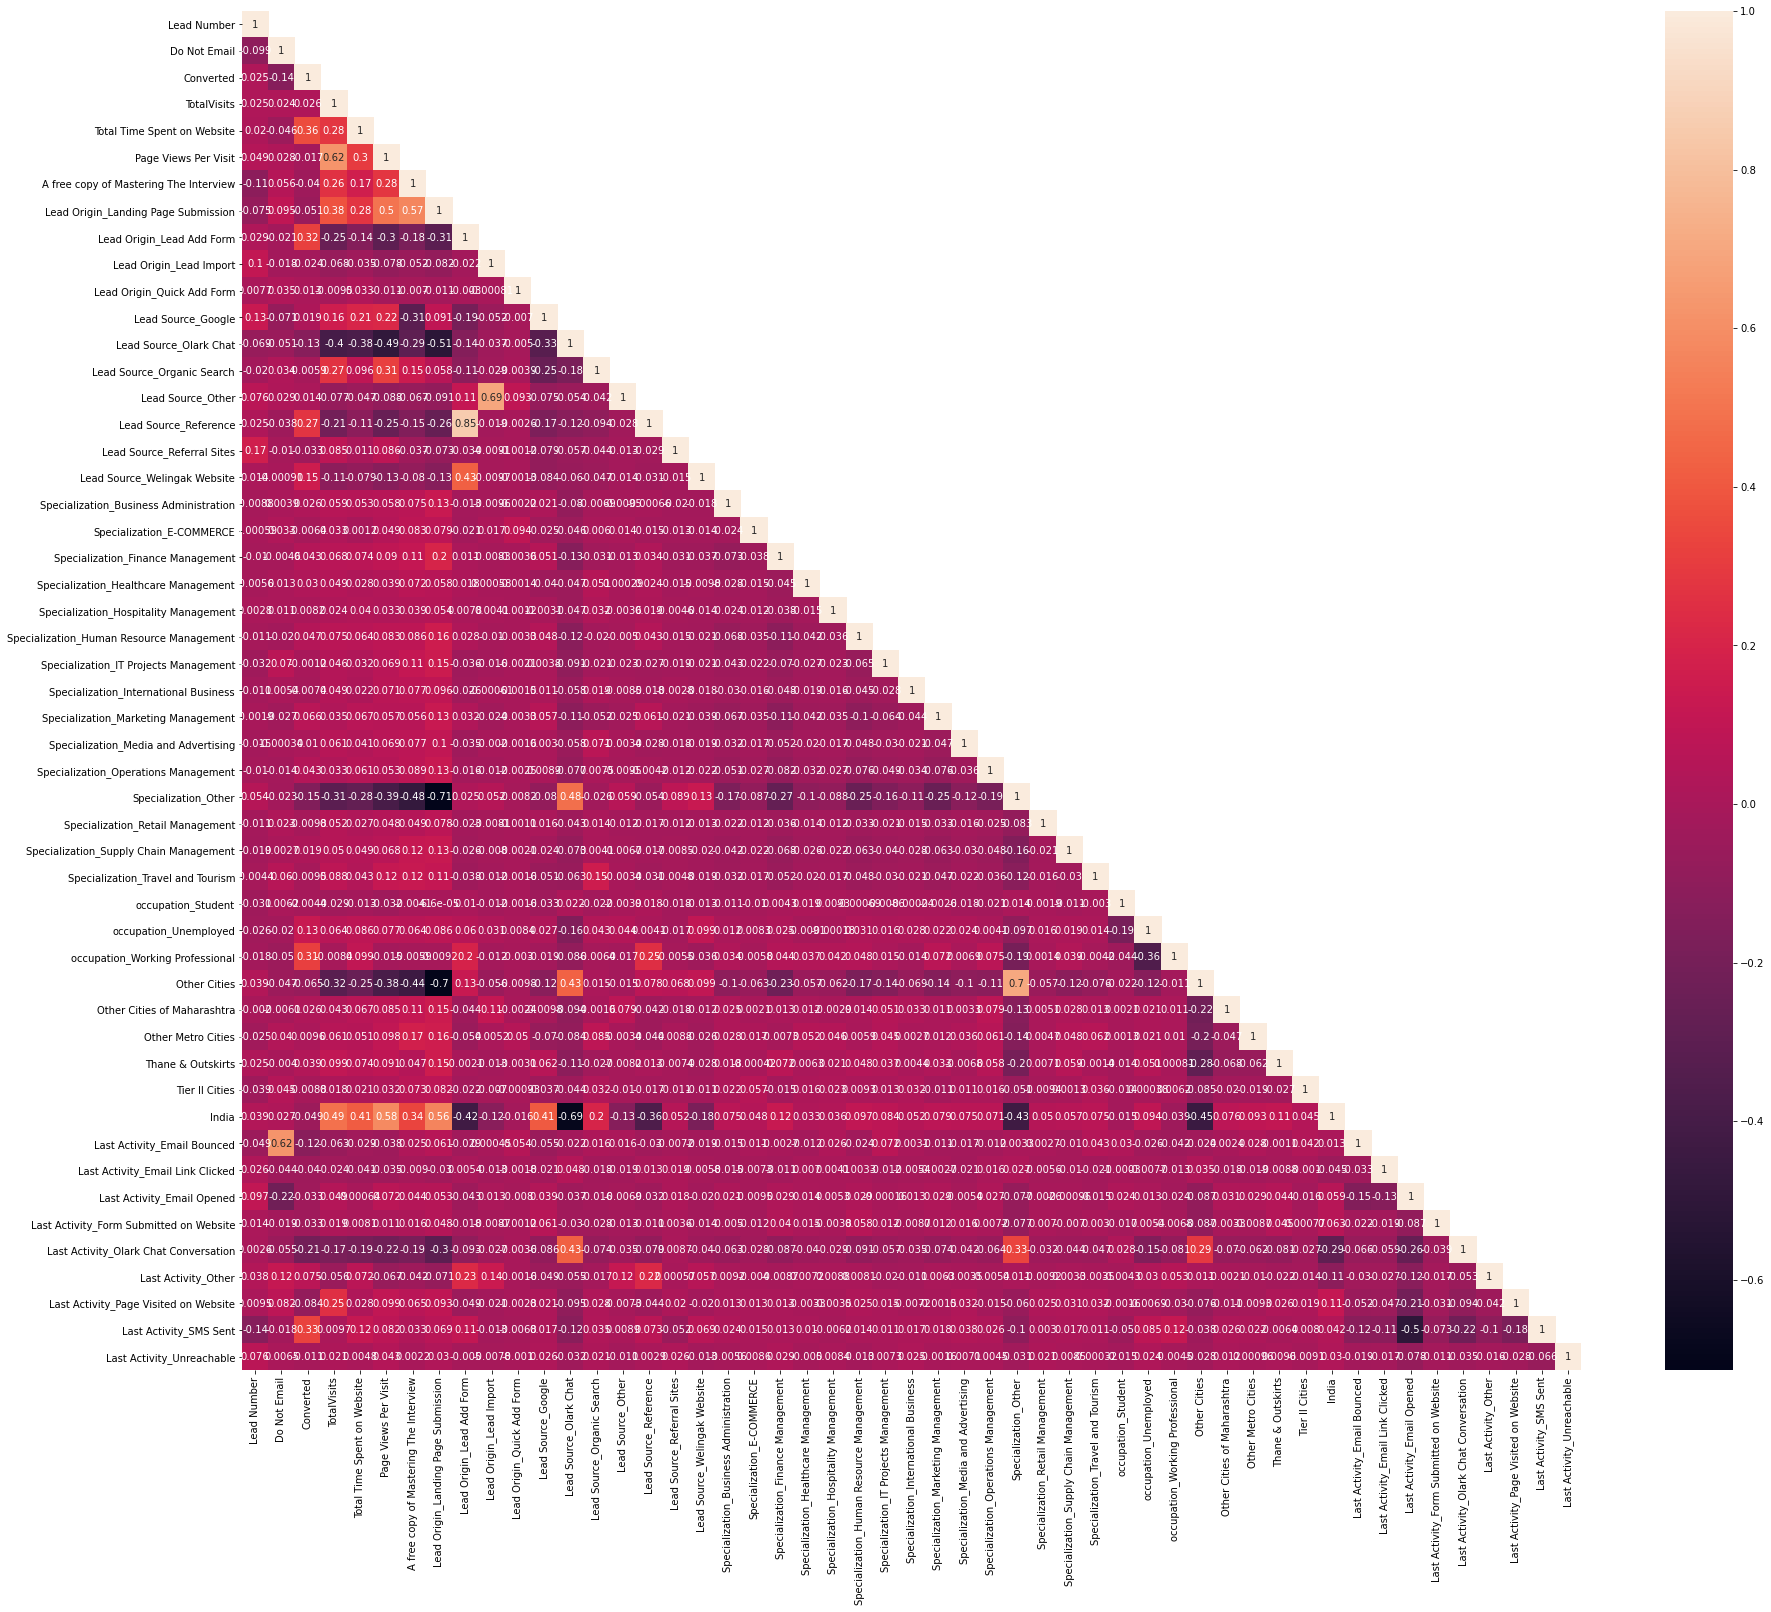

In [60]:
# Let's see the correlation matrix 
plt.figure(figsize = (30,25))
mask = np.array(score.corr())
mask[np.tril_indices_from(mask)] = False
sns.heatmap(score.corr(), mask=mask, annot = True)
plt.show()

In [61]:
#Dropping highly correlated dummy variables
X_train.drop(columns='Last Activity_Email Opened',inplace=True)
X_test.drop(columns='Last Activity_Email Opened',inplace=True)

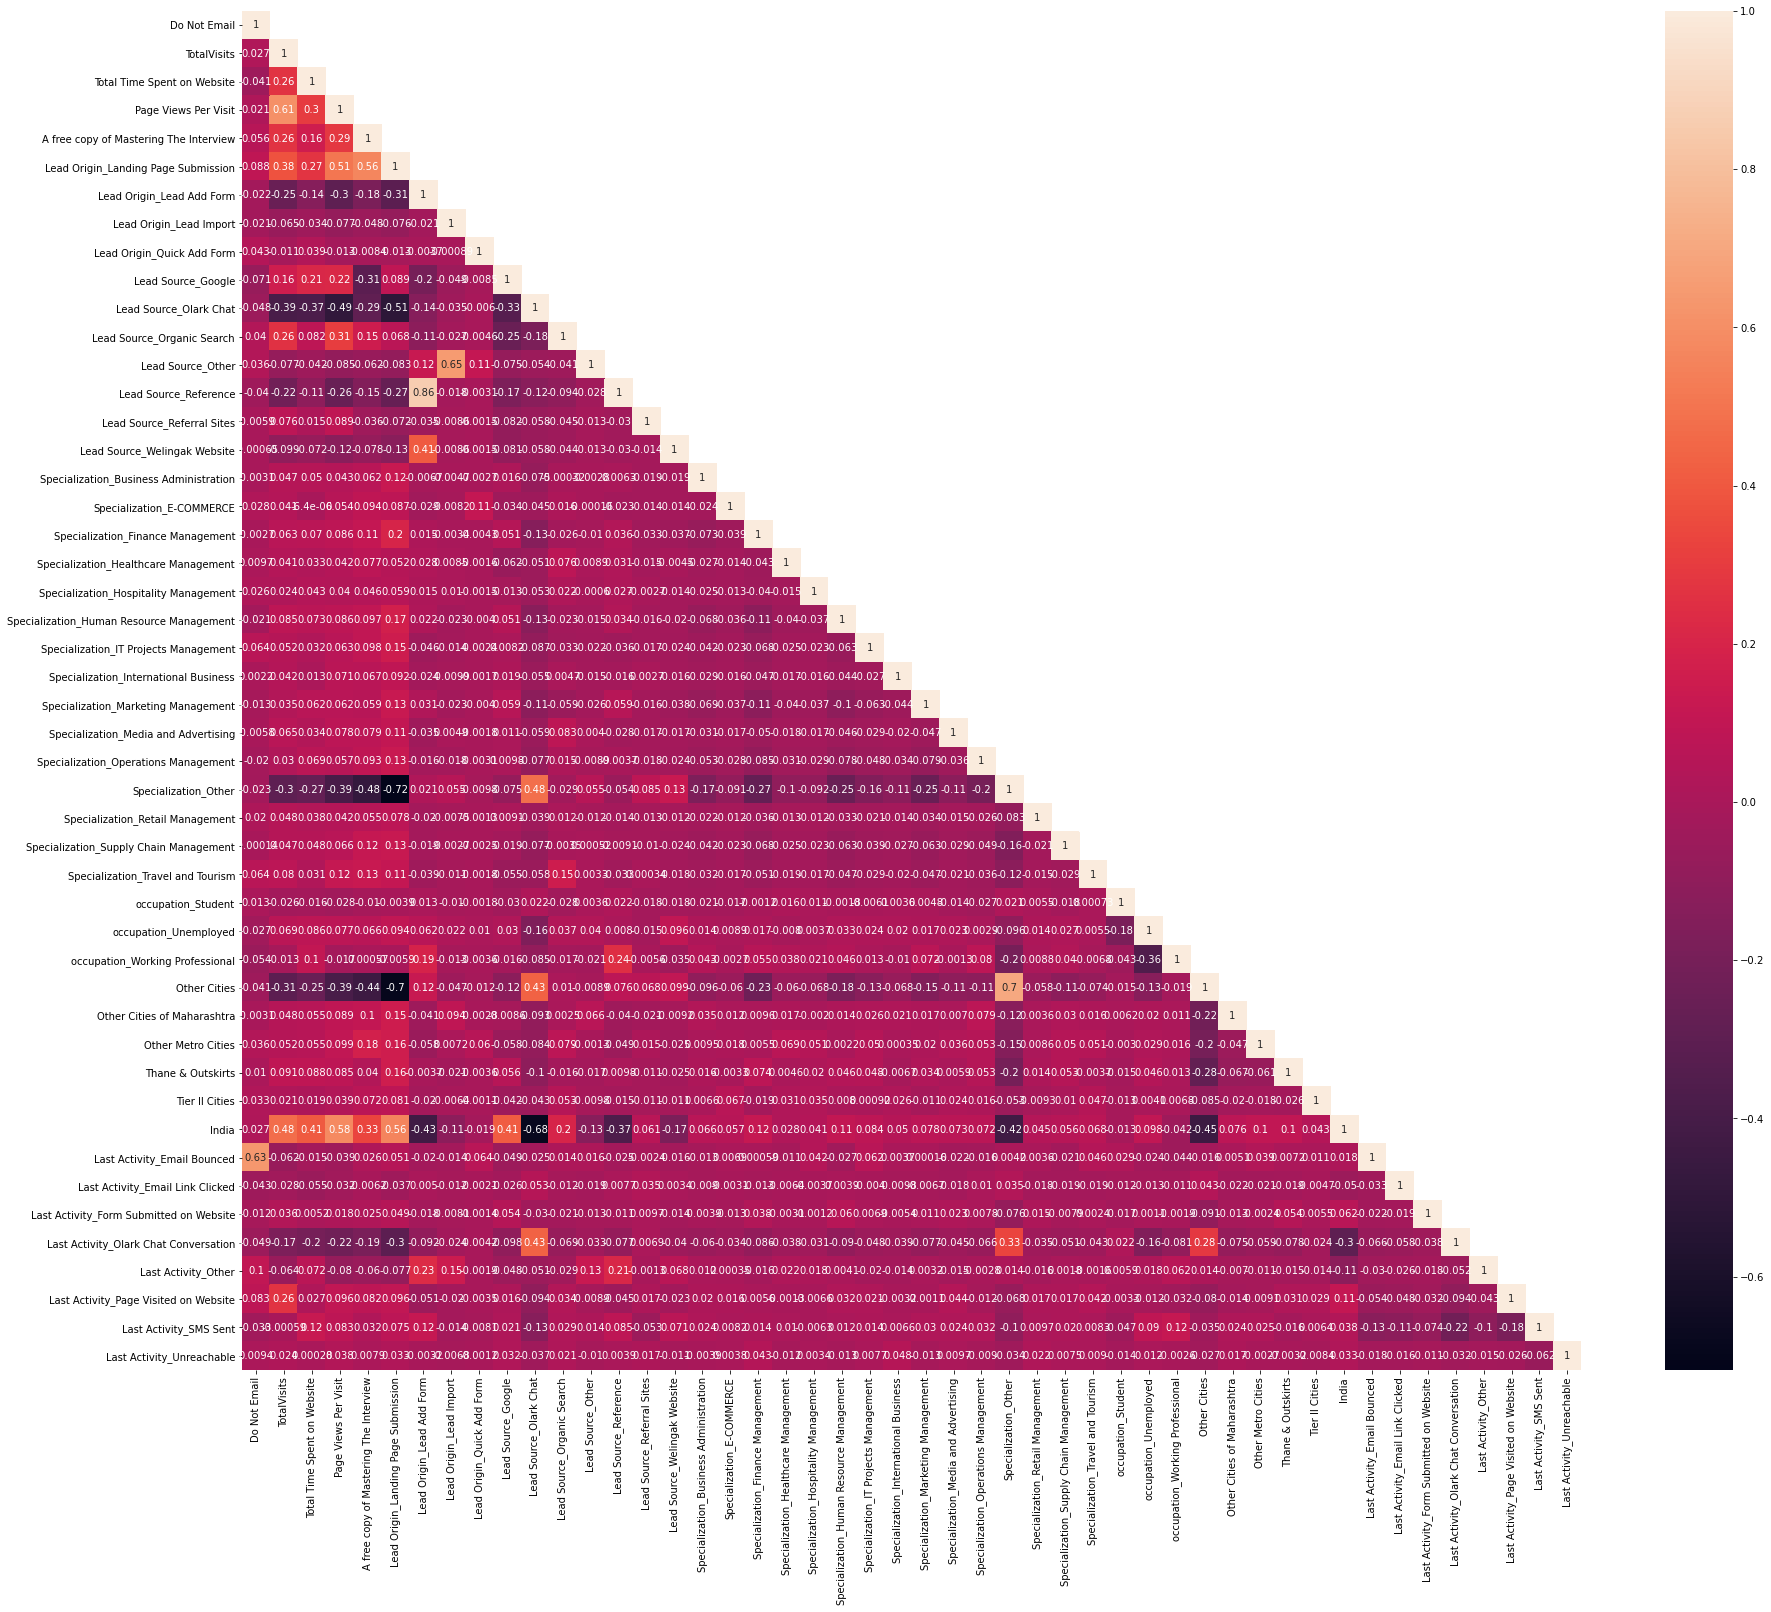

In [62]:
# Let's again see the correlation matrix 
plt.figure(figsize = (30,25))
mask = np.array(X_train.corr())
mask[np.tril_indices_from(mask)] = False
sns.heatmap(X_train.corr(), mask=mask, annot = True)
plt.show()

## Model Building

In [63]:
import statsmodels.api as sm

**Model 1**

In [64]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6419
Model Family:                Binomial   Df Model:                           48
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2607.2
Date:                Mon, 08 Mar 2021   Deviance:                       5214.4
Time:                        19:57:28   Pearson chi2:                 7.37e+03
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.9218      0.311     -2.961      0.003      -1.532      -0.312
Do Not Email                                -1.1024      0.201     -5.482      0.000      -1.496      -0.708
TotalVisits                                  0.2536      0.044      5.788      0.000       0.168       0.339
Total Time Spent on Website                  1.0763      0.041     26.568      0.000       0.997       1.156
Page Views Per Visit                        -0.1669      0.050     -3.310      0.001      -0.266      -0.068
A free copy of Mastering The Interview      -0.1821      0.109     -1.678      0.093      -0.395       0.031
Lead Origin_Landing Page Submission         -0.8503      0.140     -6.075      0.000      -1.125      -0.576
Lead Origin_Lead Add Form                    1.6234      0.749      2.167      0.030       0.155       3.092
Lead Origin_Lead Import                     -1.9398      0.840     -2.309      0.021      -3.586      -0.294
Lead Origin_Quick Add Form                  17.7726   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
Lead Source_Google                           0.2461      0.116      2.130      0.033       0.020       0.473
Lead Source_Olark Chat                       1.1070      0.207      5.351      0.000       0.702       1.512
Lead Source_Organic Search                   0.1484      0.131      1.136      0.256      -0.108       0.404
Lead Source_Other                            0.9903      0.619      1.599      0.110      -0.224       2.204
Lead Source_Reference                        1.2509      0.764      1.638      0.101      -0.246       2.748
Lead Source_Referral Sites                   0.1026      0.330      0.311      0.756      -0.544       0.750
Lead Source_Welingak Website                 3.5871      1.035      3.465      0.001       1.558       5.616
Specialization_Business Administration      -0.2775      0.245     -1.133      0.257      -0.758       0.203
Specialization_E-COMMERCE                    0.1015      0.342      0.297      0.766      -0.568       0.771
Specialization_Finance Management            0.0107      0.209      0.051      0.959      -0.400       0.421
Specialization_Healthcare Management         0.0983      0.325      0.302      0.763      -0.539       0.736
Specialization_Hospitality Management       -1.1424      0.372     -3.071      0.002      -1.872      -0.413
Specialization_Human Resource Management    -0.2120      0.213     -0.996      0.319      -0.629       0.205
Specialization_IT Projects Management        0.0556      0.256      0.217      0.828      -0.446       0.557
Specialization_International Business       -0.5283      0.311     -1.697      0.090      -1.139       0.082
Specialization_Marketing Manage

## Feature Selection

In [65]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [66]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [67]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 14),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 23),
 ('A free copy of Mastering The Interview', False, 12),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 3),
 ('Lead Origin_Quick Add Form', False, 27),
 ('Lead Source_Google', False, 20),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 26),
 ('Lead Source_Other', False, 13),
 ('Lead Source_Reference', False, 6),
 ('Lead Source_Referral Sites', False, 31),
 ('Lead Source_Welingak Website', True, 1),
 ('Specialization_Business Administration', False, 15),
 ('Specialization_E-COMMERCE', False, 25),
 ('Specialization_Finance Management', False, 29),
 ('Specialization_Healthcare Management', False, 24),
 ('Specialization_Hospitality Management', True, 1),
 ('Specialization_Human Resource Management', False, 19),
 ('Specialization_IT Projects Manage

In [68]:
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Specialization_Hospitality Management', 'Specialization_Other',
       'occupation_Student', 'occupation_Unemployed',
       'occupation_Working Professional', 'Last Activity_Email Bounced',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent'],
      dtype='object')

In [69]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Other',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Specialization_Business Administration', 'Specialization_E-COMMERCE',
       'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'Specialization_Supply Chain Management',
       'Specialization_Travel and Tourism', 'Other Cities',
       'Other Cities of Maharashtra', 'Other Metro Cities',
       'Thane & Outskirts', 'Ti

**Model 2**

In [70]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2650.9
Date:                Mon, 08 Mar 2021   Deviance:                       5301.7
Time:                        19:57:34   Pearson chi2:                 7.15e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -1.3905      0.140     -9.931      0.000      -1.665      -1.116
Do Not Email                               -1.0686      0.190     -5.611      0.000      -1.442      -0.695
Total Time Spent on Website                 1.0722      0.039     27.152      0.000       0.995       1.150
Lead Origin_Landing Page Submission        -0.8858      0.121     -7.309      0.000      -1.123      -0.648
Lead Origin_Lead Add Form                   2.9529      0.202     14.601      0.000       2.556       3.349
Lead Source_Olark Chat                      1.1318      0.122      9.306      0.000       0.893       1.370
Lead Source_Welingak Website                2.2936      0.750      3.058      0.002       0.824       3.764
Specialization_Hospitality Management      -0.9884      0.323     -3.058      0.002      -1.622      -0.355
Specialization_Other                       -0.8168      0.114     -7.159      0.000      -1.040      -0.593
occupation_Student                          1.2217      0.242      5.045      0.000       0.747       1.696
occupation_Unemployed                       1.0558      0.086     12.288      0.000       0.887       1.224
occupation_Working Professional             3.4905      0.200     17.418      0.000       3.098       3.883
Last Activity_Email Bounced                -0.8633      0.348     -2.479      0.013      -1.546      -0.181
Last Activity_Form Submitted on Website    -0.6033      0.348     -1.732      0.083      -1.286       0.079
Last Activity_Olark Chat Conversation      -1.2236      0.170     -7.203      0.000      -1.557      -0.891
Last Activity_SMS Sent                      1.2605      0.075     16.891      0.000       1.114       1.407
===========================================================================================================
"""

In [71]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred

1871    0.462026
6795    0.115960
3516    0.318412
8105    0.665261
3934    0.275075
          ...   
350     0.841420
79      0.988994
8039    0.275075
6936    0.154087
5640    0.116625
Length: 6468, dtype: float64

In [72]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred

array([0.46202589, 0.11596015, 0.3184125 , ..., 0.27507474, 0.15408652,
       0.11662497])

**Creating Dataframe with predicted probabilities**

In [73]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID
0,0,0.462026,1871
1,0,0.115960,6795
2,0,0.318412,3516
3,0,0.665261,8105
4,0,0.275075,3934


##### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [74]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted
0,0,0.462026,1871,0
1,0,0.115960,6795,0
2,0,0.318412,3516,0
3,0,0.665261,8105,1
4,0,0.275075,3934,0


In [75]:
from sklearn import metrics
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3557  445]
 [ 737 1729]]


In [76]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8172541743970315


## Checking VIFs

In [77]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [78]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,occupation_Unemployed,2.68
2,Lead Origin_Landing Page Submission,2.38
7,Specialization_Other,2.19
4,Lead Source_Olark Chat,2.03
0,Do Not Email,1.84
11,Last Activity_Email Bounced,1.78
3,Lead Origin_Lead Add Form,1.64
14,Last Activity_SMS Sent,1.59
13,Last Activity_Olark Chat Conversation,1.46
10,occupation_Working Professional,1.33


In [79]:
col = col.drop('Last Activity_Form Submitted on Website', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Specialization_Hospitality Management', 'Specialization_Other',
       'occupation_Student', 'occupation_Unemployed',
       'occupation_Working Professional', 'Last Activity_Email Bounced',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent'],
      dtype='object')

**Model 3**

In [80]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2652.5
Date:                Mon, 08 Mar 2021   Deviance:                       5304.9
Time:                        19:57:35   Pearson chi2:                 7.14e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.4134      0.139    -10.149      0.000      -1.686      -1.140
Do Not Email                             -1.0708      0.191     -5.618      0.000      -1.444      -0.697
Total Time Spent on Website               1.0722      0.039     27.162      0.000       0.995       1.150
Lead Origin_Landing Page Submission      -0.8781      0.121     -7.261      0.000      -1.115      -0.641
Lead Origin_Lead Add Form                 2.9575      0.202     14.624      0.000       2.561       3.354
Lead Source_Olark Chat                    1.1304      0.122      9.293      0.000       0.892       1.369
Lead Source_Welingak Website              2.2897      0.750      3.053      0.002       0.820       3.760
Specialization_Hospitality Management    -0.9788      0.323     -3.029      0.002      -1.612      -0.345
Specialization_Other                     -0.8012      0.114     -7.052      0.000      -1.024      -0.579
occupation_Student                        1.2309      0.242      5.085      0.000       0.756       1.705
occupation_Unemployed                     1.0581      0.086     12.320      0.000       0.890       1.226
occupation_Working Professional           3.4898      0.200     17.441      0.000       3.098       3.882
Last Activity_Email Bounced              -0.8511      0.348     -2.445      0.014      -1.533      -0.169
Last Activity_Olark Chat Conversation    -1.2143      0.170     -7.153      0.000      -1.547      -0.882
Last Activity_SMS Sent                    1.2714      0.074     17.088      0.000       1.126       1.417
=========================================================================================================
"""

In [81]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [82]:
y_train_pred_final['Conversion_Prob'] = y_train_pred

In [83]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted
0,0,0.456562,1871,0
1,0,0.116253,6795,0
2,0,0.317039,3516,0
3,0,0.668318,8105,1
4,0,0.273812,3934,0


In [84]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8166357452071737


### Check the VIF again

In [85]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,occupation_Unemployed,2.68
2,Lead Origin_Landing Page Submission,2.36
7,Specialization_Other,2.19
4,Lead Source_Olark Chat,2.03
0,Do Not Email,1.84
11,Last Activity_Email Bounced,1.78
3,Lead Origin_Lead Add Form,1.64
13,Last Activity_SMS Sent,1.58
12,Last Activity_Olark Chat Conversation,1.46
10,occupation_Working Professional,1.33


In [86]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3554,  448],
       [ 738, 1728]], dtype=int64)

In [87]:
# Actual/Predicted     not_churn    churn
        # not_churn        3554      448
        # churn            738      1728  

In [88]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8166357452071737

In [89]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [90]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7007299270072993

In [91]:
# Let us calculate specificity
TN / float(TN+FP)

0.888055972013993

In [92]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.111944027986007


In [93]:
# positive predictive value 
print (TP / float(TP+FP))

0.7941176470588235


In [94]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8280521901211556


## Plotting ROC

In [95]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [96]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

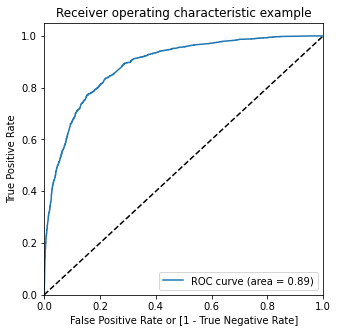

In [97]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

## Optimal Cut-Off

In [98]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.456562,1871,0,1,1,1,1,1,0,0,0,0,0
1,0,0.116253,6795,0,1,1,0,0,0,0,0,0,0,0
2,0,0.317039,3516,0,1,1,1,1,0,0,0,0,0,0
3,0,0.668318,8105,1,1,1,1,1,1,1,1,0,0,0
4,0,0.273812,3934,0,1,1,1,0,0,0,0,0,0,0


In [99]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.578850  0.981752  0.330585
0.2   0.2  0.762369  0.914031  0.668916
0.3   0.3  0.795764  0.845093  0.765367
0.4   0.4  0.816172  0.772101  0.843328
0.5   0.5  0.816636  0.700730  0.888056
0.6   0.6  0.799011  0.600973  0.921039
0.7   0.7  0.784014  0.525142  0.943528
0.8   0.8  0.760823  0.421736  0.969765
0.9   0.9  0.711194  0.260341  0.989005


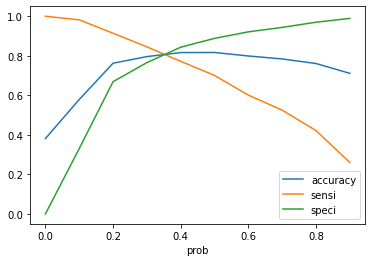

In [100]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.35 is the optimum point to take it as a cutoff probability.

In [101]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.456562,1871,0,1,1,1,1,1,0,0,0,0,0,1
1,0,0.116253,6795,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.317039,3516,0,1,1,1,1,0,0,0,0,0,0,0
3,0,0.668318,8105,1,1,1,1,1,1,1,1,0,0,0,1
4,0,0.273812,3934,0,1,1,1,0,0,0,0,0,0,0,0


In [102]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8055040197897341

In [103]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3242,  760],
       [ 498, 1968]], dtype=int64)

In [104]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [105]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7980535279805353

In [106]:
# Let us calculate specificity
TN / float(TN+FP)

0.8100949525237381

In [107]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7214076246334311


In [108]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8668449197860962


## Precision and Recall

In [109]:
from sklearn.metrics import precision_score, recall_score

In [110]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7941176470588235

In [111]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7007299270072993

In [112]:
from sklearn.metrics import precision_recall_curve

In [113]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6463    1
 6464    1
 6465    1
 6466    0
 6467    0
 Name: Converted, Length: 6468, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       0
        ..
 6463    1
 6464    1
 6465    0
 6466    0
 6467    0
 Name: predicted, Length: 6468, dtype: int64)

In [114]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

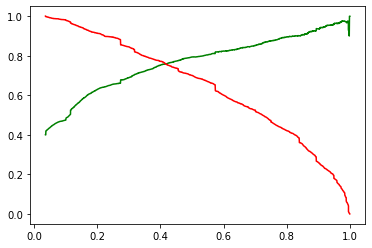

In [115]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Making Prediction

In [116]:
X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.fit_transform(X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])

In [117]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Specialization_Hospitality Management,Specialization_Other,occupation_Student,occupation_Unemployed,occupation_Working Professional,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent
4269,0,0.933036,0,0,0,0,0,1,0,0,0,0,0,1
2376,0,-0.900812,0,1,0,0,0,1,0,1,0,0,0,1
7766,0,-0.793792,0,0,0,0,0,0,0,0,1,0,0,0
9199,0,-0.900812,0,0,1,0,0,1,0,1,0,0,1,0
4359,0,-0.900812,0,1,0,0,0,0,0,1,0,0,0,0


In [118]:
X_test_sm = sm.add_constant(X_test)

In [119]:
y_test_pred = res.predict(X_test_sm)

In [120]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
4269,0.514291
2376,0.891538
7766,0.772999
9199,0.099192
4359,0.837039


In [121]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [122]:
# Putting CustID to index
y_test_df['LeadID'] = y_test_df.index

In [123]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [124]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,LeadID,0
0,1,4269,0.514291
1,1,2376,0.891538
2,1,7766,0.772999
3,0,9199,0.099192
4,1,4359,0.837039


In [125]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})

In [126]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Converted,LeadID,Conversion_Prob
0,1,4269,0.514291
1,1,2376,0.891538
2,1,7766,0.772999
3,0,9199,0.099192
4,1,4359,0.837039


***From ROC and 'Precision and Recall' we select the CUTOFF VALUE as 0.35***

In [127]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final.head()

,Converted,LeadID,Conversion_Prob,final_predicted
0,1,4269,0.514291,1
1,1,2376,0.891538,1
2,1,7766,0.772999,1
3,0,9199,0.099192,0
4,1,4359,0.837039,1


In [128]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8113275613275613

In [129]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1372,  305],
       [ 218,  877]], dtype=int64)

In [130]:
precision_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7419627749576988

In [131]:
recall_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8009132420091324

In [132]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [133]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8009132420091324

In [134]:
# Let us calculate specificity
TN / float(TN+FP)

0.8181276088252832

In [135]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7419627749576988


In [136]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8628930817610063


**The recall is 80 percent. Thus as expected from the problem statement the target lead conversion rate is 80%**

## Results

**The parameters of the model are:**

*Do Not Email x -1.0708,
Total Time Spent on Website x 1.0722,
Lead Origin_Landing Page Submission x -0.8781,
Lead Origin_Lead Add Form x 2.9575,
Lead Source_Olark Chat x 1.1304,
Lead Source_Welingak Website x 2.2897,
Specialization_Hospitality Management x -0.9788,
Specialization_Other x -0.8012,
occupation_Student x 1.2309,
occupation_Unemployed x 1.0581,
occupation_Working Professional x 3.4898,
Last Activity_Email Bounced x -0.8511,
Last Activity_Olark Chat Conversation x -1.2143,
Last Activity_SMS Sent x 1.2714*

**Top 3 Variables are:**<br>
 1. occupation_Working Professional
 2. Lead Origin_Lead Add Form
 3. Lead Source_Welingak Website